In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

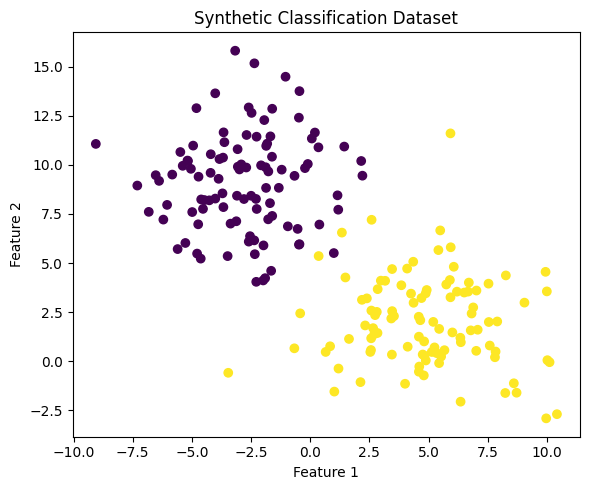

In [2]:
#Create Toy Dataset (2D Classification)
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200,centers=2,random_state=42,cluster_std=2.5)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Synthetic Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

In [3]:
#Entropy Formula
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs + 1e-9))

In [4]:
#Best Split Using Entropy
def best_split_entropy(X, y):
    best_entropy = float("inf")
    best_feature = None
    best_threshold = None

    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])

        for t in thresholds:
            left = y[X[:, feature] <= t]
            right = y[X[:, feature] > t]

            if len(left) == 0 or len(right) == 0:
                continue

            ent = (
                len(left)/len(y) * entropy(left) +
                len(right)/len(y) * entropy(right)
            )

            if ent < best_entropy:
                best_entropy = ent
                best_feature = feature
                best_threshold = t

    return best_feature, best_threshold

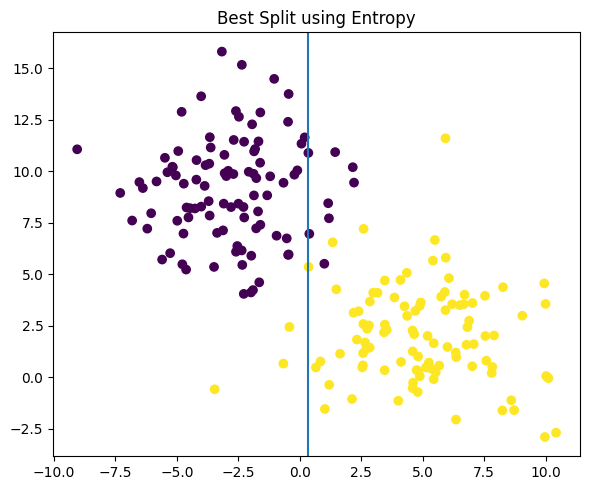

In [5]:
#Visualize Entropy Split
feature_e, threshold_e = best_split_entropy(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y)

if feature_e == 0:
    plt.axvline(threshold_e)
else:
    plt.axhline(threshold_e)

plt.title("Best Split using Entropy")
plt.tight_layout()
plt.show()